In [1]:
# %% [markdown]

"""
Homework:

The folder '~//data//homework' contains a folder 'Data', containing hand-digits of letters a-z stored in .txt.

Try to establish a network to classify the digits.

`dataLoader.py` offers APIs for loading data.
"""
# %%
import dataLoader as dl

features,labels=dl.readData(r'../data/homework/Data')


In [2]:
# %%
# 将字母转换为数字
labels1=[]
for label in labels:
    labels1.append(dl.letter2Number(label))

In [3]:
# %%
# 分离train与test
from sklearn.model_selection import train_test_split
features_train, features_test, labels_train, labels_test = train_test_split(features, labels1, test_size=.2, random_state=1)

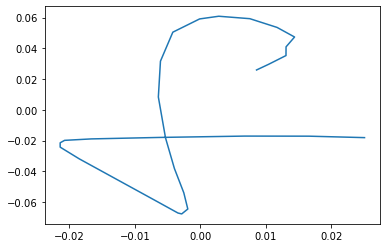

In [4]:
# %%
# 查看一个图像
import matplotlib.pyplot as plt
plt.plot(features[5,0:30],features[5,30:])
plt.suptitle="Real: "+labels[5]
plt.show()


In [5]:
# %%
# 共26类图片，0-25如下：
class_names = ['a', 'b', 'c', 'd', 'e','f', 'g', 'h', 'i', 'j'
              , 'k', 'l', 'm', 'n', 'o','p', 'q', 'r', 's', 't','u', 'v', 'w', 'x', 'y','z']


In [6]:
# %%
# 训练集包含3874张图片，每张特征值为60
features.shape


(3874, 60)

In [7]:
# %%
len(labels1)

3874

In [8]:
import tensorflow as tf
import numpy as np
from matplotlib import pyplot as plt

In [9]:
#%%
# 构建神经网络
model = tf.keras.Sequential([
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dense(26)
])

In [10]:
# %%
# 编译模型
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

In [11]:
# %%
# 训练模型
model.fit(np.array(features_train), np.array(labels_train), epochs=20, batch_size=16)

Epoch 1/20
194/194 [==============================] - 0s 768us/step - loss: 3.0320 - accuracy: 0.3311
Epoch 2/20
194/194 [==============================] - 0s 723us/step - loss: 2.3515 - accuracy: 0.5153
Epoch 3/20
194/194 [==============================] - 0s 760us/step - loss: 1.8688 - accuracy: 0.6218
Epoch 4/20
194/194 [==============================] - 0s 751us/step - loss: 1.5906 - accuracy: 0.6599
Epoch 5/20
194/194 [==============================] - 0s 772us/step - loss: 1.4161 - accuracy: 0.6851
Epoch 6/20
194/194 [==============================] - 0s 751us/step - loss: 1.3003 - accuracy: 0.7054
Epoch 7/20
194/194 [==============================] - 0s 730us/step - loss: 1.2123 - accuracy: 0.7238
Epoch 8/20
194/194 [==============================] - 0s 792us/step - loss: 1.1434 - accuracy: 0.7422
Epoch 9/20
194/194 [==============================] - 0s 772us/step - loss: 1.0898 - accuracy: 0.7538
Epoch 10/20
194/194 [==============================] - 0s 751us/step - loss: 1.042

In [12]:
# %%
# 测试模型
test_loss, test_acc = model.evaluate( np.array(features_test), np.array(labels_test), verbose=2)

print('\nTest accuracy:', test_acc)
# %%
# 这里直接接一个softmax把输出转化成概率
probability_model = tf.keras.Sequential([model, 
                                         tf.keras.layers.Softmax()])
# %%
predictions = probability_model.predict(features_test)
# %%
predictions[0]
# %%
# argmax把输出最大概率的元素，得到结果
np.argmax(predictions[0])
# %%
labels_test[0]

25/25 - 0s - loss: 0.7329 - accuracy: 0.8219 - 104ms/epoch - 4ms/step

Test accuracy: 0.8219354748725891


24

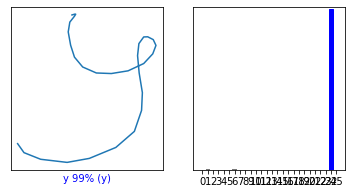

In [13]:
# %%
# 下面都是可视化，感兴趣的自己看看
def plot_image(i, predictions_array, true_label, img):
  true_label, img = true_label[i], img[i]
  plt.grid(False)
  plt.xticks([])
  plt.yticks([])
  plt.plot(features_test[i,0:30],features_test[i,30:])
  predicted_label = np.argmax(predictions_array)
  if predicted_label == true_label:
    color = 'blue'
  else:
    color = 'red'

  plt.xlabel("{} {:2.0f}% ({})".format(class_names[predicted_label],
                                100*np.max(predictions_array),
                                class_names[true_label]),
                                color=color)

def plot_value_array(i, predictions_array, true_label):
  true_label = true_label[i]
  plt.grid(False)
  plt.xticks(range(26))
  plt.yticks([])
  thisplot = plt.bar(range(26), predictions_array, color="#777777")
  plt.ylim([0, 1])
  predicted_label = np.argmax(predictions_array)

  thisplot[predicted_label].set_color('red')
  thisplot[true_label].set_color('blue')
# %%
i = 0
plt.figure(figsize=(6,3))
plt.subplot(1,2,1)
plot_image(i, predictions[i], labels_test, features_test)
plt.subplot(1,2,2)
plot_value_array(i, predictions[i],  labels_test)
plt.show()


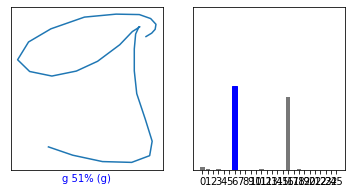

In [14]:
i = 12
plt.figure(figsize=(6,3))
plt.subplot(1,2,1)
plot_image(i, predictions[i], labels_test, features_test)
plt.subplot(1,2,2)
plot_value_array(i, predictions[i],  labels_test)
plt.show()


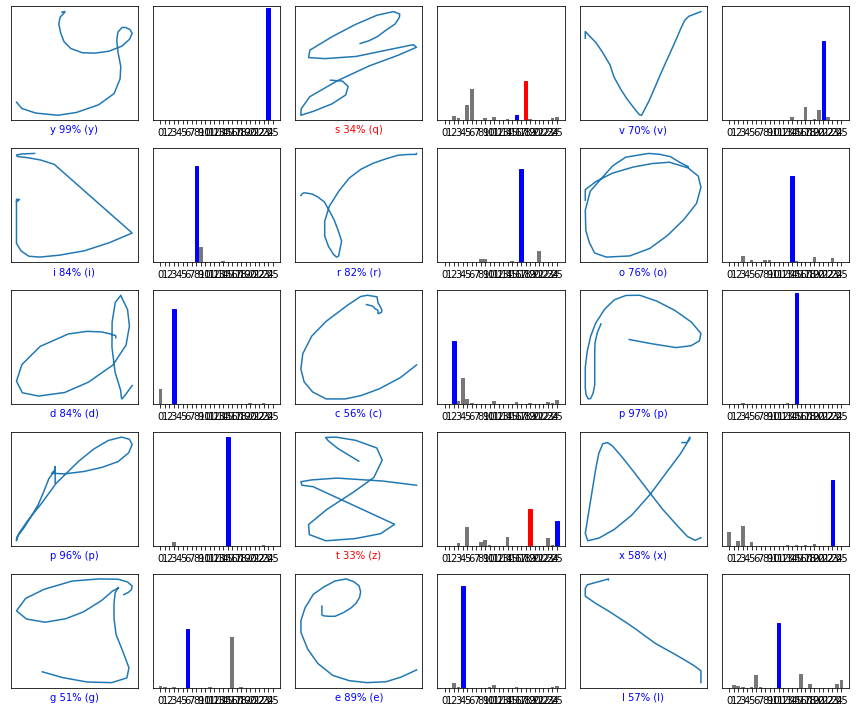

In [15]:
# %%
# Plot the first X test images, their predicted labels, and the true labels.
# Color correct predictions in blue and incorrect predictions in red.
num_rows = 5
num_cols = 3
num_images = num_rows*num_cols
plt.figure(figsize=(2*2*num_cols, 2*num_rows))
for i in range(num_images):
  plt.subplot(num_rows, 2*num_cols, 2*i+1)
  plot_image(i, predictions[i], labels_test, features_test)
  plt.subplot(num_rows, 2*num_cols, 2*i+2)
  plot_value_array(i, predictions[i], labels_test)
plt.tight_layout()
plt.show()
# %%
